In [ ]:
!pip install tensorflowjs
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.decomposition import PCA

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

import joblib


In [2]:
df = pd.read_excel("22yearsdata.xlsx")
col = df.columns
print(df.describe())
df = df.dropna()
df = df.iloc[:,1:]
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns = col[1:])
df.head

              Open         High       SMA_20   volatility          RSI  \
count  6292.000000  6292.000000  6273.000000  6278.000000  6278.000000   
mean   1849.262340  1860.512775  1847.412769    24.902578    53.586754   
std     965.079315   970.114023   961.796168    18.661836    11.184594   
min     679.280029   695.270020   736.972003     8.228793    13.639346   
25%    1177.464966  1184.605011  1179.081500    13.910114    45.522172   
50%    1403.270020  1410.734985  1401.706000    18.544480    54.491326   
75%    2267.052551  2271.837524  2260.622498    27.403443    61.997832   
max    4804.509766  4818.620117  4716.387012   152.756467    86.686650   

              MACD        MACDs        Volume  USD_Index_Data  USBond10_data  \
count  6267.000000  6259.000000  6.292000e+03     6336.000000    6281.000000   
mean      3.200515     3.211352  3.129279e+09       92.254676       3.361909   
std      23.676655    22.090527  1.609414e+09       11.126254       1.404085   
min    -237.0

<bound method NDFrame.head of           Open      High    SMA_20  volatility       RSI      MACD     MACDs  \
0     0.103398  0.101430  0.093558    0.030114  0.489071  0.714932  0.700591   
1     0.104295  0.102783  0.093413    0.029571  0.562131  0.717355  0.701682   
2     0.106607  0.104085  0.093351    0.029575  0.524717  0.718203  0.702754   
3     0.105536  0.102252  0.093384    0.027661  0.490349  0.717868  0.703533   
4     0.104525  0.102228  0.093478    0.033236  0.375056  0.713639  0.703162   
...        ...       ...       ...         ...       ...       ...       ...   
6243  0.800840  0.802396  0.808515    0.400400  0.506721  0.676365  0.632494   
6244  0.798707  0.796423  0.808529    0.381408  0.497342  0.683078  0.639150   
6245  0.804864  0.808886  0.809489    0.379415  0.576973  0.702432  0.649022   
6246  0.816308  0.815497  0.810362    0.363094  0.606332  0.723357  0.661838   
6247  0.818597  0.823612  0.810883    0.353097  0.650050  0.748464  0.677990   

        V

Open                 Axes(0.125,0.798085;0.168478x0.0819149)
High              Axes(0.327174,0.798085;0.168478x0.0819149)
SMA_20            Axes(0.529348,0.798085;0.168478x0.0819149)
volatility        Axes(0.731522,0.798085;0.168478x0.0819149)
RSI                  Axes(0.125,0.699787;0.168478x0.0819149)
MACD              Axes(0.327174,0.699787;0.168478x0.0819149)
MACDs             Axes(0.529348,0.699787;0.168478x0.0819149)
Volume            Axes(0.731522,0.699787;0.168478x0.0819149)
USD_Index_Data       Axes(0.125,0.601489;0.168478x0.0819149)
USBond10_data     Axes(0.327174,0.601489;0.168478x0.0819149)
Close             Axes(0.529348,0.601489;0.168478x0.0819149)
dtype: object

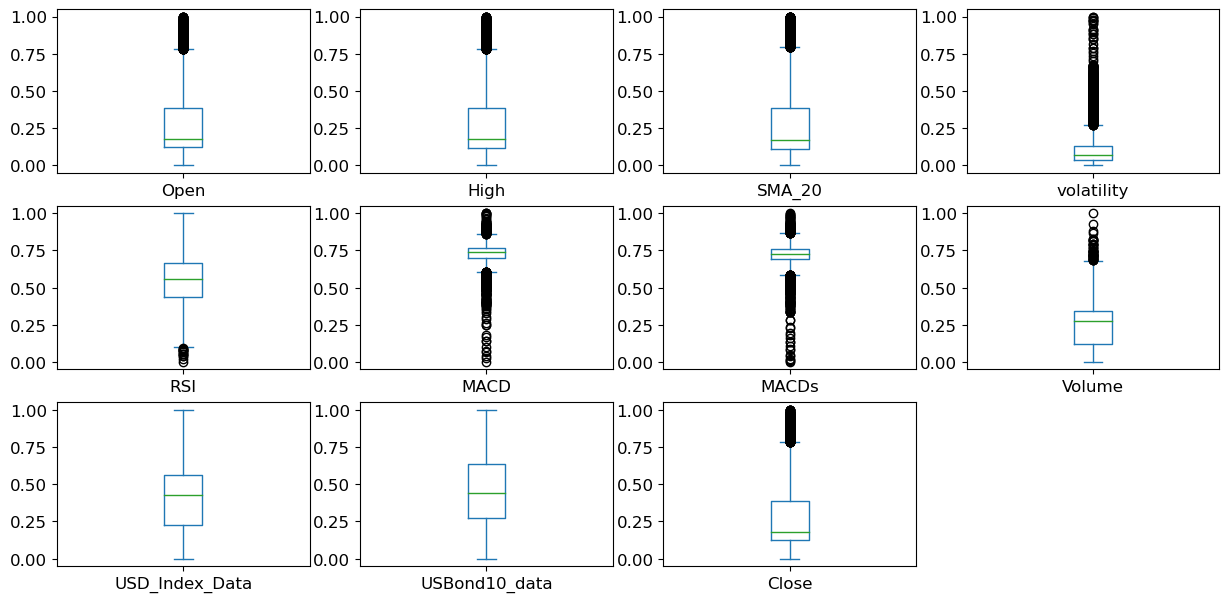

In [3]:
df.plot(kind='box', subplots=True, layout=(8,4), sharex=False,
sharey=False, fontsize=12, figsize=(15,20))

In [4]:
cols = df.columns

In [5]:
# # Outlier Removal 
# df = pd.DataFrame(df, columns = cols)
# cls = df["Close"]
# cls = pd.DataFrame(cls)
# print(cls)
# df = df.drop(columns=['Close'])
# df.head()
# print(cols)
# col2 = cols[0:10]
# print(col2)
# #non-parametric method for outlier detection and removal is the median absolute deviation (MAD) method. This method is based on the median and is less sensitive to outliers than the standard deviation method.
# median = df.median()
# mad = df.mad()

# # Calculate the lower and upper bounds for outliers for each column in the DataFrame:
# lower_bound = median - 3 * mad
# upper_bound = median + 3 * mad
# print(df)

# df = pd.DataFrame(df, columns = col2)

# # # Replace the outliers with the lower and upper bounds
# df = np.where(df > upper_bound, upper_bound, np.where(df < lower_bound, lower_bound, df))


# df = pd.DataFrame(df, columns = col2)

# # scaler3 = MinMaxScaler(feature_range=(0, 1))
# # cls = scaler3.fit_transform(cls)
# # cls = pd.DataFrame(cls)

# df = pd.concat([df,cls], axis=1)
# df = pd.DataFrame(df, columns = cols)

# print(df)

Open                 Axes(0.125,0.798085;0.168478x0.0819149)
High              Axes(0.327174,0.798085;0.168478x0.0819149)
SMA_20            Axes(0.529348,0.798085;0.168478x0.0819149)
volatility        Axes(0.731522,0.798085;0.168478x0.0819149)
RSI                  Axes(0.125,0.699787;0.168478x0.0819149)
MACD              Axes(0.327174,0.699787;0.168478x0.0819149)
MACDs             Axes(0.529348,0.699787;0.168478x0.0819149)
Volume            Axes(0.731522,0.699787;0.168478x0.0819149)
USD_Index_Data       Axes(0.125,0.601489;0.168478x0.0819149)
USBond10_data     Axes(0.327174,0.601489;0.168478x0.0819149)
Close             Axes(0.529348,0.601489;0.168478x0.0819149)
dtype: object

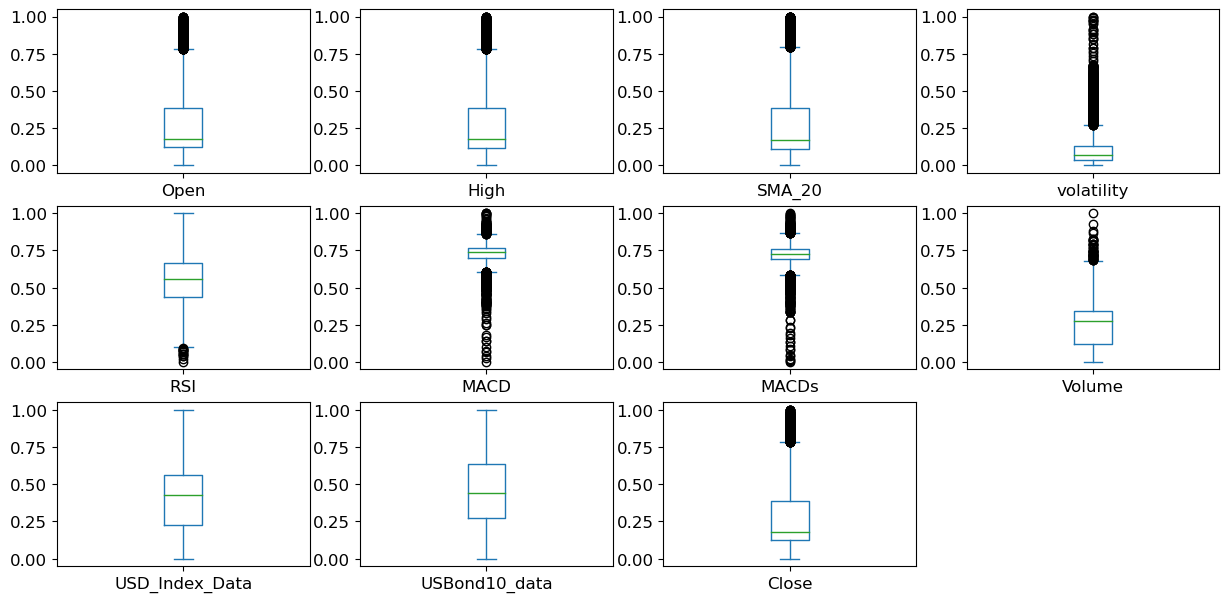

In [6]:
df.plot(kind='box', subplots=True, layout=(8,4), sharex=False,
sharey=False, fontsize=12, figsize=(15,20))

In [7]:
# Calculate correlation matrix
corr_matrix = df.corr()

<Axes: >

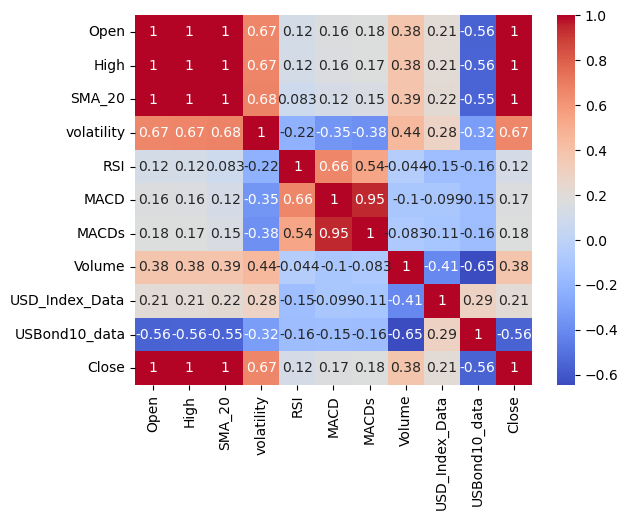

In [8]:
# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [9]:
# Display the plot
plt.show()

In [10]:
Predictors= df.iloc[:,:-1]
print(Predictors)

          Open      High    SMA_20  volatility       RSI      MACD     MACDs  \
0     0.103398  0.101430  0.093558    0.030114  0.489071  0.714932  0.700591   
1     0.104295  0.102783  0.093413    0.029571  0.562131  0.717355  0.701682   
2     0.106607  0.104085  0.093351    0.029575  0.524717  0.718203  0.702754   
3     0.105536  0.102252  0.093384    0.027661  0.490349  0.717868  0.703533   
4     0.104525  0.102228  0.093478    0.033236  0.375056  0.713639  0.703162   
...        ...       ...       ...         ...       ...       ...       ...   
6243  0.800840  0.802396  0.808515    0.400400  0.506721  0.676365  0.632494   
6244  0.798707  0.796423  0.808529    0.381408  0.497342  0.683078  0.639150   
6245  0.804864  0.808886  0.809489    0.379415  0.576973  0.702432  0.649022   
6246  0.816308  0.815497  0.810362    0.363094  0.606332  0.723357  0.661838   
6247  0.818597  0.823612  0.810883    0.353097  0.650050  0.748464  0.677990   

        Volume  USD_Index_Data  USBond1

In [11]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(Predictors)

In [12]:
Predictions = df.iloc[:,-1]
print(Predictions)

0       0.105094
1       0.107409
2       0.106337
3       0.105324
4       0.101332
          ...   
6243    0.801208
6244    0.799688
6245    0.813412
6246    0.818999
6247    0.827785
Name: Close, Length: 6248, dtype: float64


In [13]:
df_pca = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
df_pca['target'] = Predictions

Text(0, 0.5, 'Principal Component 2')

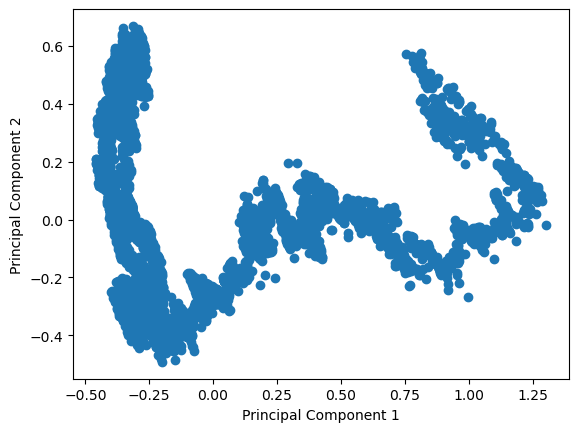

In [14]:
# Create a scatter plot of the first two principal components
# Create figure and axis objects
fig, ax = plt.subplots()
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


In [15]:
# Plot horizontal line at y=0
ax.axhline(y=0, color='grey', linestyle='--')

# Plot vertical line at x=0
ax.axvline(x=0, color='grey', linestyle='--')

plt.show()

<class 'pandas.core.series.Series'>
Open              0.999774
High              0.999881
SMA_20            0.998392
volatility        0.665436
RSI               0.123698
MACD              0.165268
MACDs             0.175269
Volume            0.380404
USD_Index_Data    0.211666
USBond10_data    -0.556897
dtype: float64


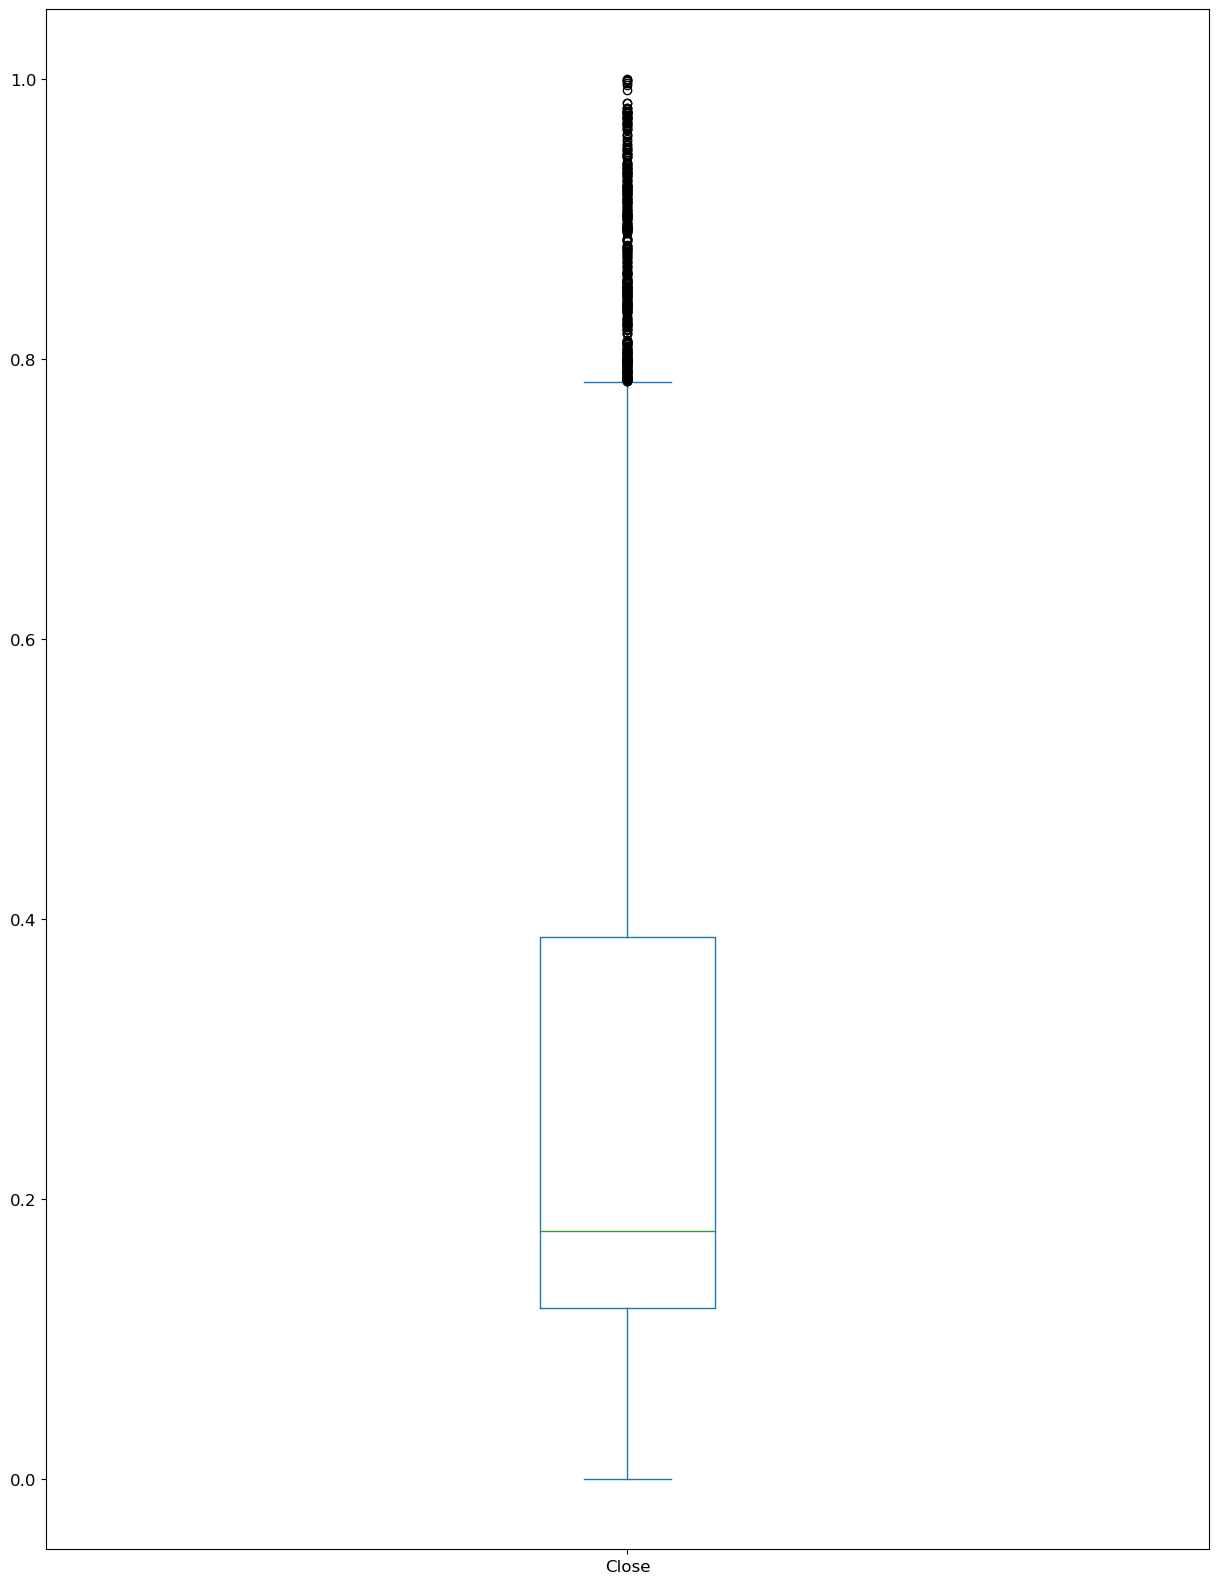

In [16]:
Predictions.plot(kind='box', subplots=True, sharex=False,
sharey=False, fontsize=12, figsize=(15,20))

corr = Predictors.corrwith(Predictions)
print(type(corr))
print(corr)

In [17]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


In [18]:
a= pd.concat([Predictors,Predictions],axis=1)
reframed = series_to_supervised(a, 1, 1)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[11,12,13,14,15,16,17,18,19,20]], axis=1, inplace=True)
print(reframed.head)

<bound method NDFrame.head of       var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1      0.103398   0.101430   0.093558   0.030114   0.489071   0.714932   
2      0.104295   0.102783   0.093413   0.029571   0.562131   0.717355   
3      0.106607   0.104085   0.093351   0.029575   0.524717   0.718203   
4      0.105536   0.102252   0.093384   0.027661   0.490349   0.717868   
5      0.104525   0.102228   0.093478   0.033236   0.375056   0.713639   
...         ...        ...        ...        ...        ...        ...   
6243   0.790242   0.794856   0.808574   0.417835   0.497615   0.666484   
6244   0.800840   0.802396   0.808515   0.400400   0.506721   0.676365   
6245   0.798707   0.796423   0.808529   0.381408   0.497342   0.683078   
6246   0.804864   0.808886   0.809489   0.379415   0.576973   0.702432   
6247   0.816308   0.815497   0.810362   0.363094   0.606332   0.723357   

      var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...   var2(t)   var3(t)  \
1  

In [19]:
# split into train and test sets
values = reframed.values

n_train_time = 300
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(300, 1, 21) (300,) (5947, 1, 21) (5947,)


In [20]:
model = Sequential()
print(f"shape {train_X.shape[1]},{train_X.shape[2]}")
model.add(LSTM(512, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(units=1))
# model.add(LSTM(70))
# model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


shape 1,21


In [21]:
# fit network
history = model.fit(train_X, train_y, epochs=27, batch_size=33 , validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/27
10/10 - 12s - loss: 0.0026 - val_loss: 0.0793 - 12s/epoch - 1s/step
Epoch 2/27
10/10 - 1s - loss: 0.0027 - val_loss: 0.0813 - 1s/epoch - 131ms/step
Epoch 3/27
10/10 - 1s - loss: 0.0018 - val_loss: 0.0851 - 1s/epoch - 132ms/step
Epoch 4/27
10/10 - 1s - loss: 9.6579e-04 - val_loss: 0.0812 - 1s/epoch - 132ms/step
Epoch 5/27
10/10 - 1s - loss: 9.4890e-04 - val_loss: 0.0782 - 1s/epoch - 141ms/step
Epoch 6/27
10/10 - 1s - loss: 0.0011 - val_loss: 0.0791 - 1s/epoch - 141ms/step
Epoch 7/27
10/10 - 1s - loss: 8.5498e-04 - val_loss: 0.0752 - 1s/epoch - 125ms/step
Epoch 8/27
10/10 - 1s - loss: 0.0010 - val_loss: 0.0748 - 1s/epoch - 129ms/step
Epoch 9/27
10/10 - 1s - loss: 9.2175e-04 - val_loss: 0.0724 - 1s/epoch - 114ms/step
Epoch 10/27
10/10 - 1s - loss: 9.3284e-04 - val_loss: 0.0703 - 1s/epoch - 130ms/step
Epoch 11/27
10/10 - 1s - loss: 9.1647e-04 - val_loss: 0.0680 - 1s/epoch - 122ms/step
Epoch 12/27
10/10 - 1s - loss: 8.9762e-04 - val_loss: 0.0649 - 1s/epoch - 126ms/step
Epoch 13/2

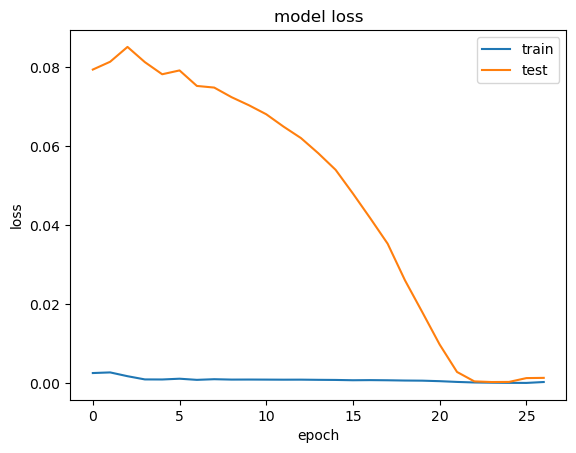

In [22]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [23]:
# make a prediction
yhat = model.predict(test_X)

186/186 [==============================] - 3s 5ms/step


In [24]:
test_X = test_X.reshape((test_X.shape[0], 21))
# invert scaling for forecast
inv_yhat = np.concatenate((test_X[:, -10:],yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_X[:, -10:],test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

In [25]:
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

my_df = pd.DataFrame(inv_y)
my_df.describe

Test RMSE: 151.780


<bound method NDFrame.describe of                 0
0     1328.050049
1     1322.180054
2     1305.329956
3     1313.709961
4     1300.290039
...           ...
5942  3977.530029
5943  3971.270020
5944  4027.810059
5945  4050.830078
5946  4087.030029

[5947 rows x 1 columns]>

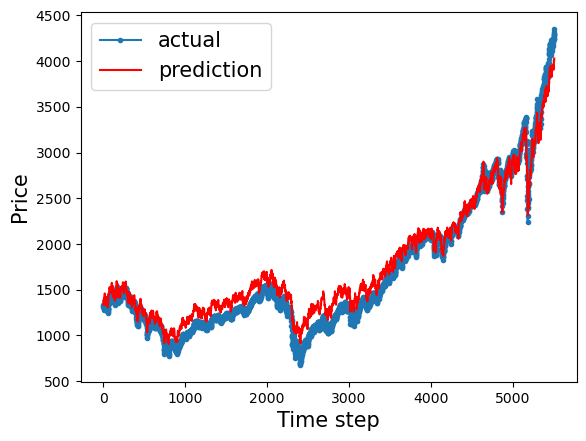

[1380.94737351 1374.1680873  1361.69040413 ... 3737.23703761 3775.2826688
 3780.35546874]


In [26]:

interval = 5508
aa=[x for x in range(interval)]
plt.plot(aa, inv_y[:interval], marker='.', label="actual")
plt.plot(aa, inv_yhat[:interval], 'r', label="prediction")
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

print(inv_yhat)

In [27]:
def recursive_forecast(model, input_data, n_days):
    forecast = []
    current_input = input_data[-1].copy()

    for _ in range(n_days):
        prediction = model.predict(current_input.reshape(1, 1, -1))
        forecast.append(prediction[0, 0])
        current_input = np.roll(current_input, -1)
        current_input[-1] = prediction

    return np.array(forecast)

In [28]:
n_days = 6
yhat = recursive_forecast(model, test_X, n_days)
# Reshape yhat to (1, n_days)
yhat = yhat.reshape(-1, 1)

1/1 [==============================] - 0s 43ms/step


In [29]:
inv_yhat = np.concatenate((test_X[:n_days, -10:],yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]

print(inv_yhat)

[3780.35546874 3390.80313566 3180.97605003 3035.79014352 3290.43944524
 2849.73942862]


[99, 100, 101, 102, 103, 104, 105]


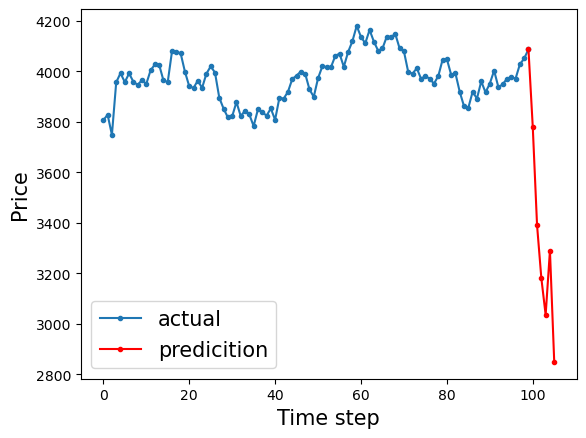

In [30]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 days.

interval = 100
predictinterval = interval+n_days
aa=[x for x in range(interval)]
bb = [x for x in range(interval-1,predictinterval)]
print(bb)


plt.plot(aa, inv_y[len(inv_y) - interval:], marker='.', label="actual")
inv_yhat = np.insert(inv_yhat, 0, inv_y[-1])
plt.plot(bb, inv_yhat[:], 'r', marker='.', label="predicition")
# plt.plot(aa, inv_yhat[:interval], 'r', label="prediction")
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [31]:
# Assume 'model' is your trained scikit-learn model
import joblib
joblib.dump(model, 'SnPmodel.joblib')

INFO:tensorflow:Assets written to: ram://1fd71e9d-10f3-4175-9e65-5e7126570a4e/assets


INFO:tensorflow:Assets written to: ram://1fd71e9d-10f3-4175-9e65-5e7126570a4e/assets


['SnPmodel.joblib']

In [32]:
# Save the model in TensorFlow format
model.save('path/to/save/your/model')

INFO:tensorflow:Assets written to: path/to/save/your/model\assets


INFO:tensorflow:Assets written to: path/to/save/your/model\assets


In [33]:
# Save the model in JSON format
json_model = model.to_json()
with open('path/to/save/your/model.json', 'w') as json_file:
    json_file.write(json_model)

In [36]:

model.save('model.json')

INFO:tensorflow:Assets written to: model.json\assets


INFO:tensorflow:Assets written to: model.json\assets


In [38]:
# Save the model as a SavedModel
import tensorflow as tf
tf.saved_model.save(model, 'path/to/saved/model')

INFO:tensorflow:Assets written to: path/to/saved/model\assets


INFO:tensorflow:Assets written to: path/to/saved/model\assets


In [44]:
print(test_X[0])

[0.16041531 0.15900906 0.16183773 0.07334314 0.33477314 0.71303007
 0.73167792 0.04369784 0.57859596 0.85913926 0.15829738 0.15743122
 0.15749813 0.16104402 0.07366492 0.33237787 0.70535687 0.72373215
 0.03591409 0.5794052  0.85977444]
